# MULTILAYER PERCEPTRON USING KERAS

## The Perceptron

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier, MLPRegressor
import tensorflow as tf
import keras_tuner as kt

import datetime
import matplotlib.pyplot as plt

2024-02-12 20:43:39.747995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Loads the dataset

iris = load_iris(as_frame=True)

# Prepares training dataset
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)    # Iris setosa is labelled as zero

In [3]:
# Builds and fits the model

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
# Performs predictions for two instances

X_new = [[2, 0.5], [3, 1]]
predictions = perceptron_clf.predict(X_new) # predicts True and False for these 2 flowers

print(predictions)

[ True False]


## The Multilayer Perceptron and Backpropagation

### Regression MLPs

In [6]:
# Loads the dataset
housing = fetch_california_housing()

# Prepares training and testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [7]:
# Creates the model and pipeline
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# Fits the model
pipeline.fit(X_train, y_train)

# Performs predictions on test dataset
predictions = pipeline.predict(X_test)

# Measure model performance on test dataset
rmse = mean_squared_error(y_test, predictions, squared=False)
print(rmse)

0.5211279195574301


### Classification MLPs

In [9]:
# Prepares training and testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

In [10]:
# Creates the model and pipeline
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# Fits the model
pipeline.fit(X_train, y_train)

# Measure model performance on test dataset
accuracy = pipeline.score(X_test, y_test)
print(accuracy)

1.0


## Implementing MLPs with Keras

### Building an Image Classifier Using the Sequential API

#### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. The dataset is already split between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. 55,000 images be used for training, and 5,000 for validation.

In [ ]:
# Loads the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Extracts training and testing dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

#### Exploring the dataset

In [15]:
# Checks the training set size
print(X_train.shape)

(55000, 28, 28)


Training set contains 55,000 grayscale images, each 28x28 pixels.

In [16]:
# Checks each pixel intensity
print(X_train.dtype)

uint8


Each pixel is represented as a byte (0 to 255):

In [17]:
# Scales the training, validation and testing data
X_train, X_val, X_test = X_train/255., X_val/255., X_test/255.

In [18]:
# Prints the category indexes
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [19]:
# Sets the categories against their indexes
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

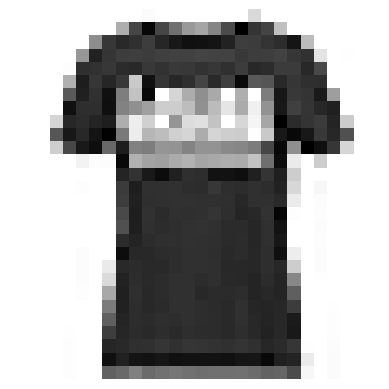

'T-shirt/top'

In [20]:
# Now, shows the image of the fashion category from the first training instance

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

categories[y_train[0]]

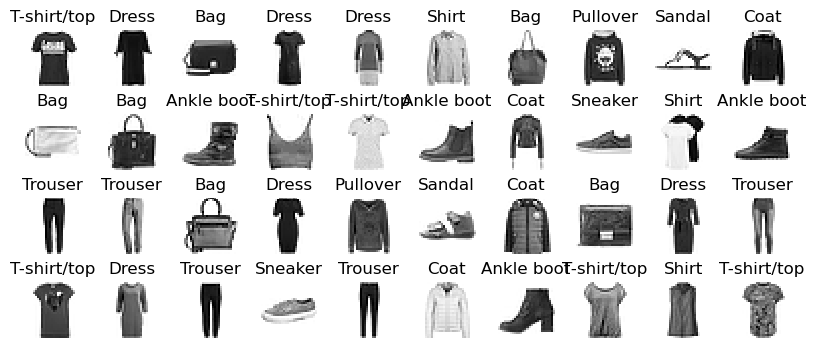

In [21]:
# Prints few of the fasion categories from the training data set
n_rows = 4
n_cols = 10
#plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
plt.figure(figsize=(n_cols, n_rows))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(categories[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Creating the model using the Sequential API

In [22]:
# Ensures the random weights of the hidden layers and the output layer will be
# the same every time the notebook is run
tf.random.set_seed(42)

# Creates a Sequential model for neural networks composed of a single
# stack of layers connected sequentially. This is called the sequential API.
model = tf.keras.Sequential()

# First layer (an Input layer) gets created and added into the model.
model.add(tf.keras.layers.Input(shape=[28, 28]))

# A flatten layer converts each input image into a 1D array 784 elements from  # 28 x 28 matrix.
model.add(tf.keras.layers.Flatten())

# A Dense hidden layer with 300 neurons with ReLU activation function gets added. 
# Each Dense layer manages its own weight matrix, containing all the connection weights between
# the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
model.add(tf.keras.layers.Dense(300, activation="relu"))

# A second Dense hidden layer with 100 neurons with ReLU activation function also gets added.
model.add(tf.keras.layers.Dense(100, activation="relu"))

# A Dense output layer with 10 neurons (one per class) with softmax activation 
# function gets added because the classes are exclusive.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-02-12 00:11:41.636760: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
# Shows the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


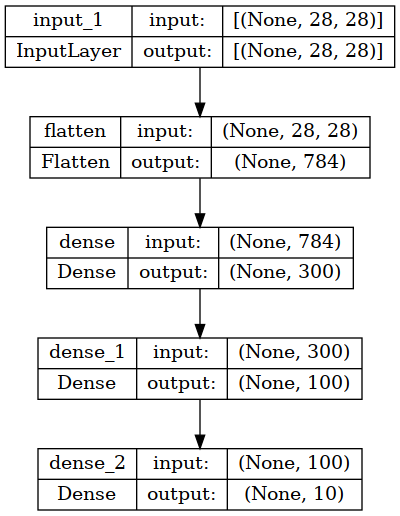

In [24]:
# Visualizes the model architecture
# NOTE: This visualization has dependency on package PyPlot and GraphViz
tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
# Compiles the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#### Training and Evaluating the model

In [26]:
# Fits the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7130 - accuracy: 0.7638 - val_loss: 0.4948 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 25s 14ms/step - loss: 0.4878 - accuracy: 0.8303 - val_loss: 0.4253 - val_accuracy: 0.8556
Epoch 3/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4465 - accuracy: 0.8420 - val_loss: 0.4004 - val_accuracy: 0.8646
Epoch 4/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4176 - accuracy: 0.8536 - val_loss: 0.3824 - val_accuracy: 0.8692
Epoch 5/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3986 - accuracy: 0.8607 - val_loss: 0.3824 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3825 - accuracy: 0.8645 - val_loss: 0.3586 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3691 - accuracy: 0.8686 - val_loss: 0.3417 -

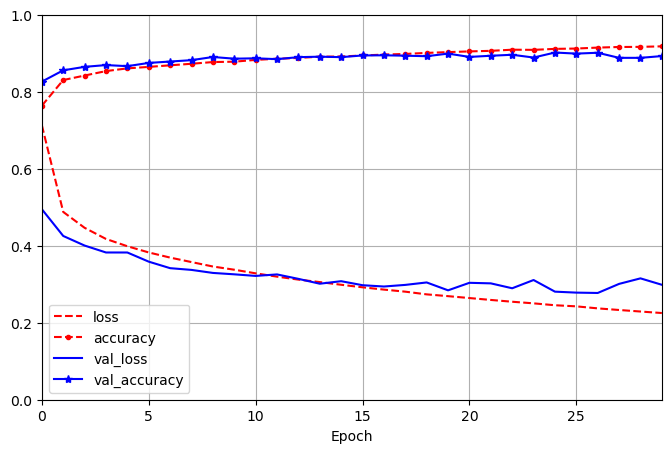

In [27]:
# Visualizing the learning curves

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [28]:
# Evaluating the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3526 - accuracy: 0.8744


[0.35259848833084106, 0.8744000196456909]

#### Using the model to make predictions

In [29]:
# Takes first three instance from test set to make predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)  # Gets the probability distribution for prediction
print(y_proba.round(2))

1/1 [==============================] - 0s 124ms/step
[[0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.98]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [30]:
# Extracts category index against the highest probability from the probability distribution
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [31]:
# Shows the predicted categories

np.array(categories)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

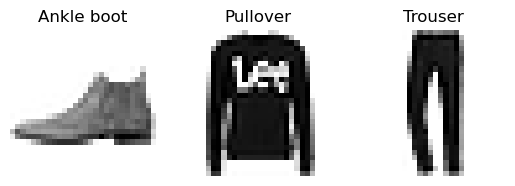

In [32]:
# Visualize the category images to ensure about correct predictions

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(categories[y_test[index]])
plt.show()

### Building a Regressor Using Sequential API

#### Loads the dataset

In [33]:
housing = fetch_california_housing()

In [34]:
# Prepares training and testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [35]:
# Checks the size of the training dataset
X_train.shape

(11610, 8)

#### Creating the model using the Sequential API

In [36]:
# reset the name counters
tf.random.set_seed(42)

# Builds the model
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

#### Training and Evaluating the model

In [37]:
# Learns feature means and standard deviations
norm_layer.adapt(X_train)

# Fits the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8272 - root_mean_squared_error: 0.9095 - val_loss: 0.3862 - val_root_mean_squared_error: 0.6214
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3749 - root_mean_squared_error: 0.6123 - val_loss: 2.0085 - val_root_mean_squared_error: 1.4172
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3632 - root_mean_squared_error: 0.6026 - val_loss: 0.4093 - val_root_mean_squared_error: 0.6398
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3371 - root_mean_squared_error: 0.5806 - val_loss: 0.7461 - val_root_mean_squared_error: 0.8638
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3268 - root_mean_squared_error: 0.5716 - val_loss: 7.4891 - val_root_mean_squared_error: 2.7366
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3729 - root_mean_squared_error: 0.6107 - val_loss: 0.6080 - val_

In [38]:
# Evaluates the model
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(rmse_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.2872 - root_mean_squared_error: 0.5359
0.5359127521514893


#### Using the model to make predictions

In [39]:
# Takes first three instance from test set to make predictions
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 72ms/step
[[0.5803019]
 [1.1937593]
 [4.8521442]]


### Building Complex Models using the Functional API

#### Loads the dataset

In [3]:
housing = fetch_california_housing()

# Prepares training and testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42)

#### Creating the model using Functional API

In [2]:
# reset the name counters
tf.keras.backend.clear_session()

tf.random.set_seed(42)

In [4]:
# Builds the layers

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [5]:
# Organizes the layers

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

2024-02-12 11:56:59.937222: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Shows the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

#### Training and Evaluating the model

In [7]:
# Compiles the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [8]:
# Fits the model
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.5428 - root_mean_squared_error: 1.2421 - val_loss: 0.6306 - val_root_mean_squared_error: 0.7941
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4437 - root_mean_squared_error: 0.6661 - val_loss: 0.5398 - val_root_mean_squared_error: 0.7347
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3969 - root_mean_squared_error: 0.6300 - val_loss: 0.4009 - val_root_mean_squared_error: 0.6331
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3737 - root_mean_squared_error: 0.6113 - val_loss: 0.5996 - val_root_mean_squared_error: 0.7744
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3604 - root_mean_squared_error: 0.6003 - val_loss: 0.4062 - val_root_mean_squared_error: 0.6373
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3532 - root_mean_squared_error: 0.5943 - val_loss: 0.5757 - val_

In [9]:
# Evaluates the model
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3113 - root_mean_squared_error: 0.5580
[0.31133005023002625, 0.5579695701599121]


In [10]:
# Takes first three instance from test set to make predictions
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 96ms/step
[[0.4887748]
 [1.2239927]
 [4.5495086]]


#### Handling Multiple Outputs
Sending different subsets of input features through the wide or deep paths.
It sends 5 features (features 0 to 4) through wide path, and 6 features (features 2 to 7) through the deep path.

In [11]:
# reset the name counters
tf.keras.backend.clear_session()

tf.random.set_seed(42)

In [12]:
# Builds the layers

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [14]:
# Compiles the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [15]:
# Trains and evaluates the model

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_val_wide, X_val_deep = X_val[:, :5], X_val[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_val_wide, X_val_deep), y_val))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.5143 - root_mean_squared_error: 1.2306 - val_loss: 4.0228 - val_root_mean_squared_error: 2.0057
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4908 - root_mean_squared_error: 0.7006 - val_loss: 1.1207 - val_root_mean_squared_error: 1.0586
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4264 - root_mean_squared_error: 0.6530 - val_loss: 0.4734 - val_root_mean_squared_error: 0.6880
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4078 - root_mean_squared_error: 0.6386 - val_loss: 0.3755 - val_root_mean_squared_error: 0.6128
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3965 - root_mean_squared_error: 0.6297 - val_loss: 0.3766 - val_root_mean_squared_error: 0.6137
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3865 - root_mean_squared_error: 0.6217 - val_loss: 0.3669 - val_

In [16]:
# Evauates the model

X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
print(mse_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3280 - root_mean_squared_error: 0.5727
[0.3280080258846283, 0.5727198719978333]


### Saving and Restoring the Model

In [17]:
# Saves the model
model.save("my_MLP_regression_model", save_format="tf")

INFO:tensorflow:Assets written to: my_MLP_regression_model/assets


INFO:tensorflow:Assets written to: my_MLP_regression_model/assets


In [20]:
# Loads the model back
model = tf.keras.models.load_model("my_MLP_regression_model")

In [27]:
# Makes predictions after model was loaded
y_pred = model.predict((X_test_wide, X_test_deep))

162/162 [==============================] - 0s 2ms/step


### Using Callbacks

In [28]:
# Configures the checkpoint
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)

# Fits the model with checkpoint callback set
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_val_wide, X_val_deep), (y_val, y_val)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714 - val_loss: 0.6619 - val_root_mean_squared_error: 0.8136
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3308 - root_mean_squared_error: 0.5752 - val_loss: 1.0362 - val_root_mean_squared_error: 1.0179
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3266 - root_mean_squared_error: 0.5715 - val_loss: 0.5679 - val_root_mean_squared_error: 0.7536
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3236 - root_mean_squared_error: 0.5689 - val_loss: 1.1729 - val_root_mean_squared_error: 1.0830
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3259 - root_mean_squared_error: 0.5709 - val_loss: 1.5420 - val_root_mean_squared_error: 1.2418
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3292 - root_mean_squared_error: 0.5737 - val_loss: 0.7782 - val_

In [29]:
# Configures early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Fits the model with both checkpoint and early stopping callback set
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_val_wide, X_val_deep), (y_val, y_val)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3110 - root_mean_squared_error: 0.5577 - val_loss: 0.3645 - val_root_mean_squared_error: 0.6037
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3113 - root_mean_squared_error: 0.5579 - val_loss: 0.8973 - val_root_mean_squared_error: 0.9473
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3161 - root_mean_squared_error: 0.5623 - val_loss: 0.5264 - val_root_mean_squared_error: 0.7256
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3127 - root_mean_squared_error: 0.5592 - val_loss: 1.1359 - val_root_mean_squared_error: 1.0658
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3157 - root_mean_squared_error: 0.5618 - val_loss: 1.2456 - val_root_mean_squared_error: 1.1160
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3145 - root_mean_squared_error: 0.5608 - val_loss: 0.6281 

### Using TensorBoard for Visualization

In [31]:
# reset the name counters
tf.keras.backend.clear_session()

tf.random.set_seed(42)

In [32]:
# Buils model using Sequential API

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [33]:
# Compiles the model

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [38]:
# Adapts to train data by finding its feature wise mean and variance
norm_layer.adapt(X_train)

# Create log dir for TensorBoard to store logs
log_dir = "./logs/" + datetime.datetime.now().strftime("%Y.%m.%d-%H:%M:%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir, profile_batch=(100, 200))

# Trains the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2024-02-12 15:19:51.569072: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-02-12 15:19:51.569151: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-02-12 15:19:51.569913: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


134/363 [==========>...................] - ETA: 0s - loss: 3.3321 - root_mean_squared_error: 1.8254

2024-02-12 15:19:52.304718: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-02-12 15:19:52.304780: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


229/363 [=================>............] - ETA: 0s - loss: 3.1019 - root_mean_squared_error: 1.7612

2024-02-12 15:19:53.122193: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-02-12 15:19:53.153610: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-02-12 15:19:53.158700: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: ./logs/2024.02.12-15:19:51/plugins/profile/2024_02_12_15_19_53/pradip-Lenovo-V15-G4-AMN.xplane.pb


363/363 [==============================] - 2s 6ms/step - loss: 2.4238 - root_mean_squared_error: 1.5569 - val_loss: 1.8063 - val_root_mean_squared_error: 1.3440
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7659 - root_mean_squared_error: 0.8752 - val_loss: 0.7471 - val_root_mean_squared_error: 0.8643
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6568 - root_mean_squared_error: 0.8104 - val_loss: 0.6814 - val_root_mean_squared_error: 0.8255
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6168 - root_mean_squared_error: 0.7854 - val_loss: 0.5633 - val_root_mean_squared_error: 0.7506
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5861 - root_mean_squared_error: 0.7656 - val_loss: 0.5383 - val_root_mean_squared_error: 0.7337
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5586 - root_mean_squared_error: 0.7474 - val_loss: 0.5096 - val_root_mean_s

The following magic command loads TensorBoard directly into the Jupyter

%load_ext tensorboard

%tensorboard --logdir=./logs

TensorBoard can also be accessed through browser by executing the following command in the terminal.

tensorboard --logdir=./logs

## Fine-Tuning Neural Network Hyperparameters

#### Loads the dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Prepares training and testing dataset

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

#### Searching for hyperparameters

In [4]:
def build_model(hp):
    """
    A callable that takes hyperparameters and returns a model instance
    """
    
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    
    learning_rate = hp.Float("learning_rate", min_value=1e-4, 
                             max_value=1e-2, sampling="log")
    
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Builds the modes from the above hyperparameters
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer, metrics=["accuracy"])
    
    return model

In [5]:
# reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [6]:
# Performs a basic random search for hyperparameters

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_hyperparameters_randome_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 5 Complete [00h 01m 35s]
val_accuracy: 0.847000002861023

Best val_accuracy So Far: 0.8695999979972839
Total elapsed time: 00h 11m 07s


In [7]:
# Receives top 3 models
top3_models = random_search_tuner.get_best_models(num_models=3)

best_model = top3_models[0]  # The best models

In [8]:
# Receives hyperparameters for top 3 models

top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [9]:
# Gets the best trial
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8695999979972839


In [10]:
# Metrics can also be accessed directly
best_trial.metrics.get_last_value("val_accuracy")

0.8695999979972839

#### Retraining and Evaluating the model

In [11]:
# Training can be continued for a few epochs on the full training set
best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3365 - accuracy: 0.8766
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3265 - accuracy: 0.8793
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3164 - accuracy: 0.8827
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3086 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3023 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2954 - accuracy: 0.8907
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2881 - accuracy: 0.8941
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2829 - accuracy: 0.8953
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2766 - accuracy: 0.8979
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step -

In [12]:
# Evaluates the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.4025 - accuracy: 0.8573
0.8572999835014343
